## Step 1: Data Loading and Initial Exploration

In [121]:
import numpy as np 
import pandas as pd

Load the datasets:

In [122]:
train = pd.read_csv('twitter_training.csv')
test = pd.read_csv('twitter_validation.csv')

In [123]:
print(train.head())
print(test.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [125]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

Combine datasets:

In [126]:
train.columns = ['id', 'entity', 'sentiment', 'text']
test.columns = ['id', 'entity', 'sentiment', 'text']

In [127]:
data = pd.concat([train, test], axis=0, ignore_index=True)

In [128]:
data.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         75680 non-null  int64 
 1   entity     75680 non-null  object
 2   sentiment  75680 non-null  object
 3   text       74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Initial data exploration:

In [130]:
data['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [131]:
data['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [132]:
data['text'].isnull().sum()

686

In [133]:
data['text'].duplicated().sum()

5706

In [134]:
data = data.drop_duplicates(subset=['text'], keep='first')

In [135]:
data = data.dropna(subset=['text'])

In [136]:
data['text'].isnull().sum()

0

In [137]:
data['text'].duplicated().sum()

0

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69973 entries, 0 to 75676
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         69973 non-null  int64 
 1   entity     69973 non-null  object
 2   sentiment  69973 non-null  object
 3   text       69973 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


## Step 2: Text Preprocessing

Normalize text:

In [139]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def normalize_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    normalized_text = ' '.join(tokens)
    
    return normalized_text

In [140]:
data['normalized_text'] = data['text'].apply(normalize_text)

In [141]:
data['normalized_text'] = data['normalized_text'].replace('', np.nan)  
data = data.dropna(subset=['normalized_text'])

In [142]:
data.tail()

,id,entity,sentiment,text,normalized_text
75668,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,♥️ suikoden ️⃣ alex kidd miracle world 😢 perso...
75669,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...,thank matching fund home depot rw payment gene...
75671,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...,late night stream boy come watch warzone run s...
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,⭐️ toronto art culture capital canada ’ wonder...
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewer one people...


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69701 entries, 0 to 75676
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               69701 non-null  int64 
 1   entity           69701 non-null  object
 2   sentiment        69701 non-null  object
 3   text             69701 non-null  object
 4   normalized_text  69701 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


Remove noise:

In [144]:
def remove_noise(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [145]:
data['removed_noise_text'] = data['normalized_text'].apply(remove_noise)

In [155]:
data.tail()

,id,entity,sentiment,text,normalized_text,removed_noise_text,word_count
75668,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,♥️ suikoden ️⃣ alex kidd miracle world 😢 perso...,suikoden alex kidd miracle world persona soul ...,12
75669,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...,thank matching fund home depot rw payment gene...,thank matching fund home depot rw payment gene...,14
75671,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...,late night stream boy come watch warzone run s...,late night stream boy come watch warzone run s...,17
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,⭐️ toronto art culture capital canada ’ wonder...,toronto art culture capital canada wonder want...,24
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewer one people...,actually good move tot bring viewer one people...,25


Handle empty texts:

In [146]:
print("Empty texts after cleaning:", data['removed_noise_text'].eq('').sum())
print("Class distribution after preprocessing:\n", data['sentiment'].value_counts())

Empty texts after cleaning: 41
Class distribution after preprocessing:
 sentiment
Negative      21186
Positive      19113
Neutral       17137
Irrelevant    12265
Name: count, dtype: int64


In [147]:
data = data[data['removed_noise_text'].str.strip() != '']

In [148]:
print("Empty texts after cleaning:", data['removed_noise_text'].eq('').sum())
print("Class distribution after preprocessing:\n", data['sentiment'].value_counts())

Empty texts after cleaning: 0
Class distribution after preprocessing:
 sentiment
Negative      21179
Positive      19099
Neutral       17122
Irrelevant    12260
Name: count, dtype: int64


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69660 entries, 0 to 75676
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  69660 non-null  int64 
 1   entity              69660 non-null  object
 2   sentiment           69660 non-null  object
 3   text                69660 non-null  object
 4   normalized_text     69660 non-null  object
 5   removed_noise_text  69660 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.7+ MB


## Step 3: Exploratory Data Analysis (EDA)

Class distribution:

Class Distribution (%):
sentiment
Negative      30.403388
Positive      27.417456
Neutral       24.579386
Irrelevant    17.599770
Name: proportion, dtype: float64


C:\Users\DELL G5\AppData\Local\Temp\ipykernel_13608\4058493310.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette='viridis')


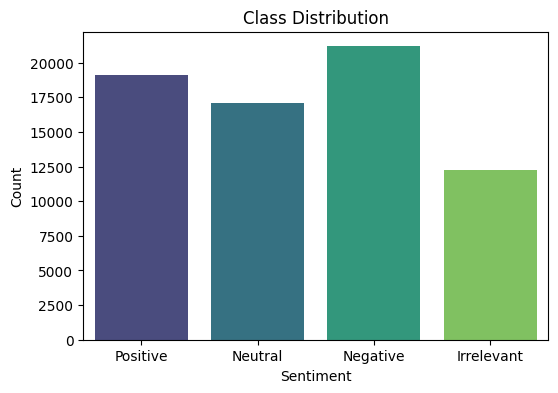

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class_distribution = data['sentiment'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(class_distribution)

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='sentiment', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Text length analysis:

Average Word Count per Sentiment:
sentiment
Irrelevant    11.151631
Negative      11.421880
Neutral       11.998073
Positive      10.116551
Name: word_count, dtype: float64


C:\Users\DELL G5\AppData\Local\Temp\ipykernel_13608\2789320816.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='sentiment', y='word_count', palette='viridis')


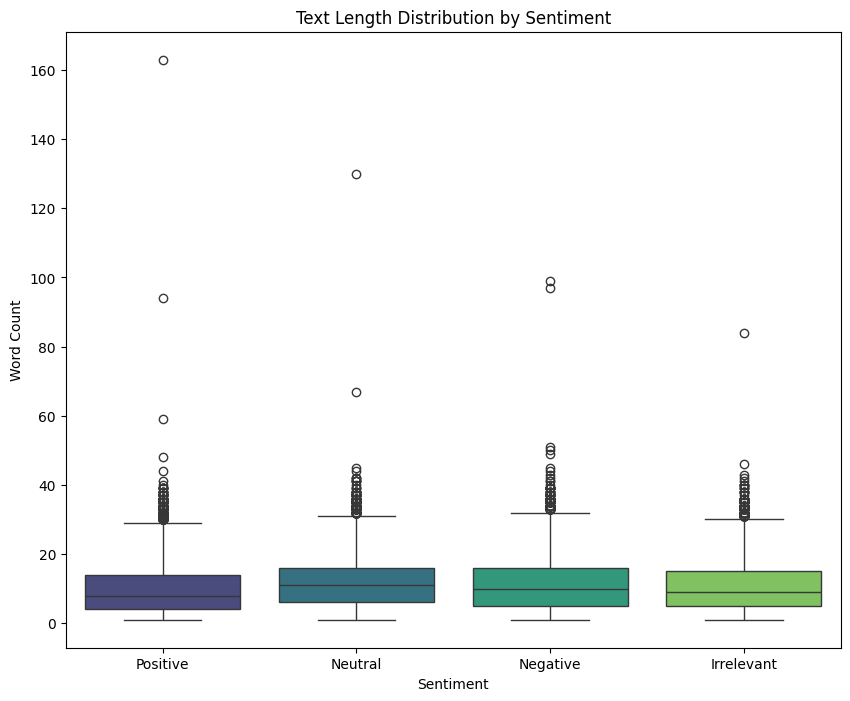

In [151]:
data['word_count'] = data['removed_noise_text'].apply(lambda x: len(x.split()))

avg_word_count = data.groupby('sentiment')['word_count'].mean()
print("Average Word Count per Sentiment:")
print(avg_word_count)

plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='sentiment', y='word_count', palette='viridis')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

Word clouds:

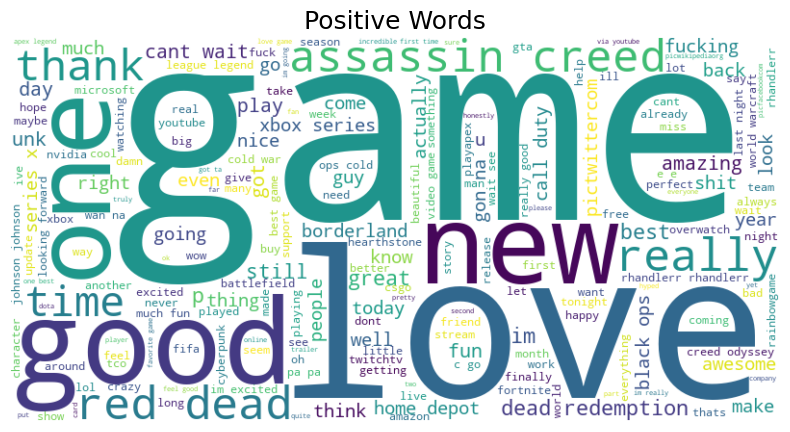

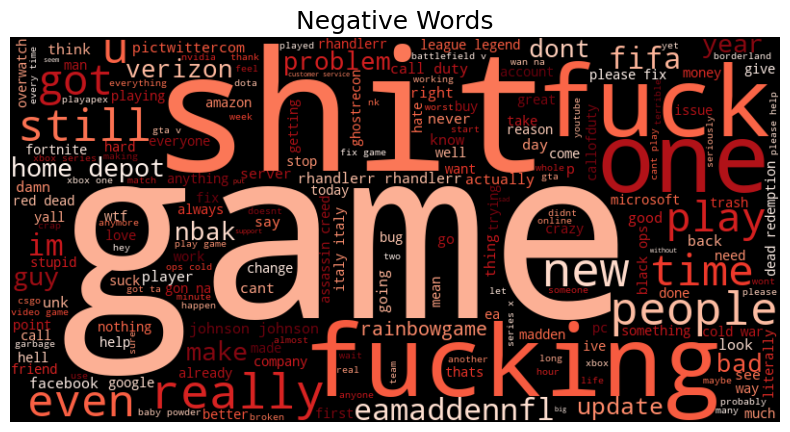

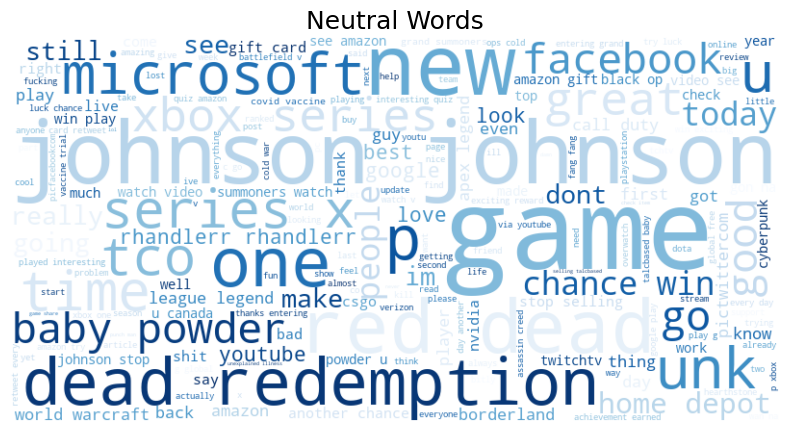

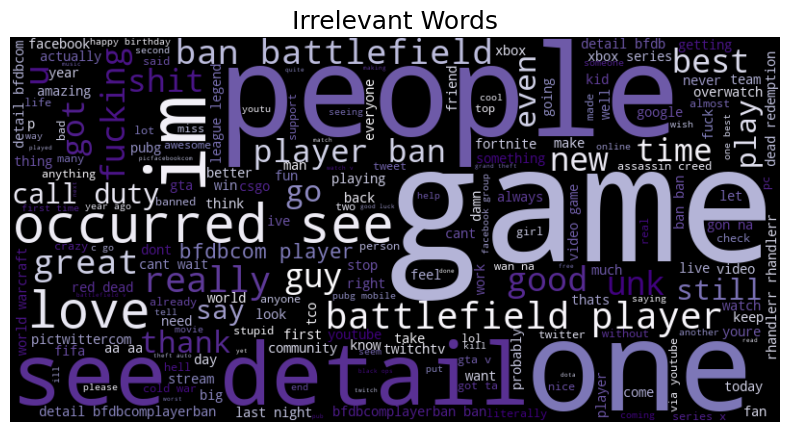

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title, background_color='white', colormap='viridis'):
    if not text.strip():
        print(f"No valid text found for {title}. Skipping word cloud generation.")
        return
    
    wordcloud = WordCloud(width=800, height=400, background_color=background_color, colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

positive_text = ' '.join(data[data['sentiment'] == 'Positive']['removed_noise_text'].dropna())
negative_text = ' '.join(data[data['sentiment'] == 'Negative']['removed_noise_text'].dropna())
neutral_text = ' '.join(data[data['sentiment'] == 'Neutral']['removed_noise_text'].dropna())
irrelevant_text = ' '.join(data[data['sentiment'] == 'Irrelevant']['removed_noise_text'].dropna())

generate_wordcloud(positive_text, 'Positive Words')
generate_wordcloud(negative_text, 'Negative Words', 'black', 'Reds')
generate_wordcloud(neutral_text, 'Neutral Words', 'white', 'Blues')
generate_wordcloud(irrelevant_text, 'Irrelevant Words', 'black', 'Purples')

N-gram analysis:

C:\Users\DELL G5\AppData\Local\Temp\ipykernel_13608\1055986065.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette=color)


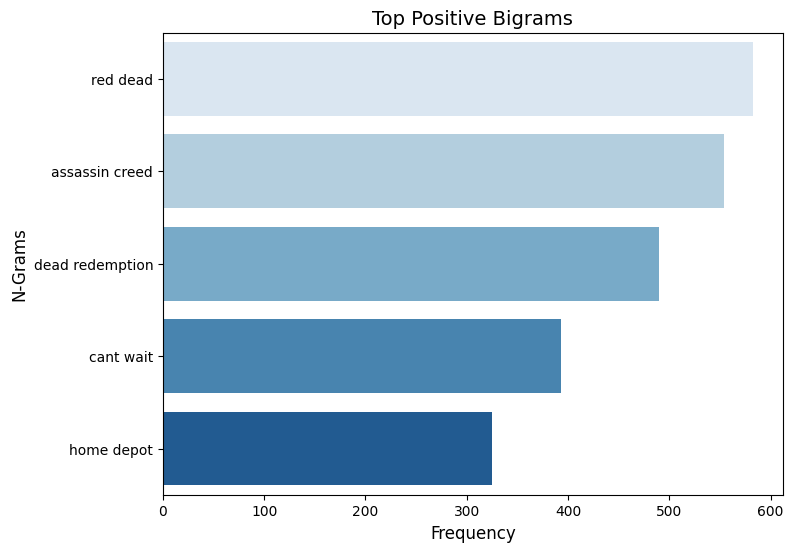

C:\Users\DELL G5\AppData\Local\Temp\ipykernel_13608\1055986065.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette=color)


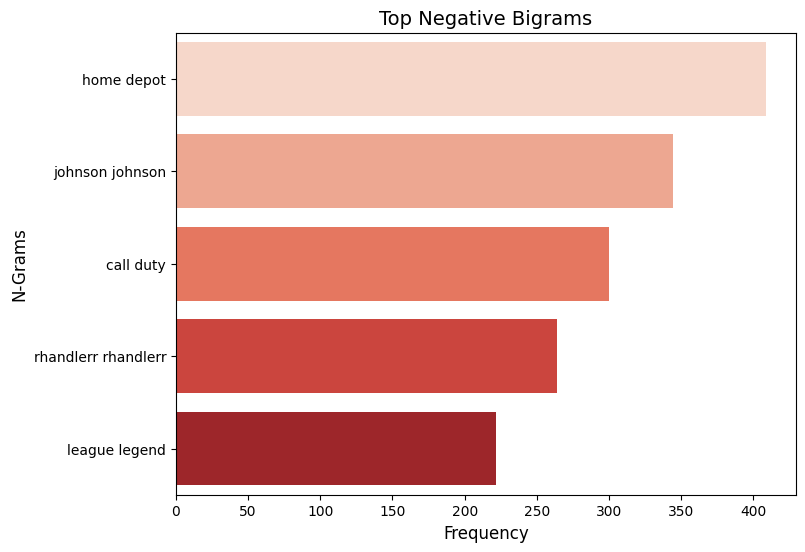

C:\Users\DELL G5\AppData\Local\Temp\ipykernel_13608\1055986065.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette=color)


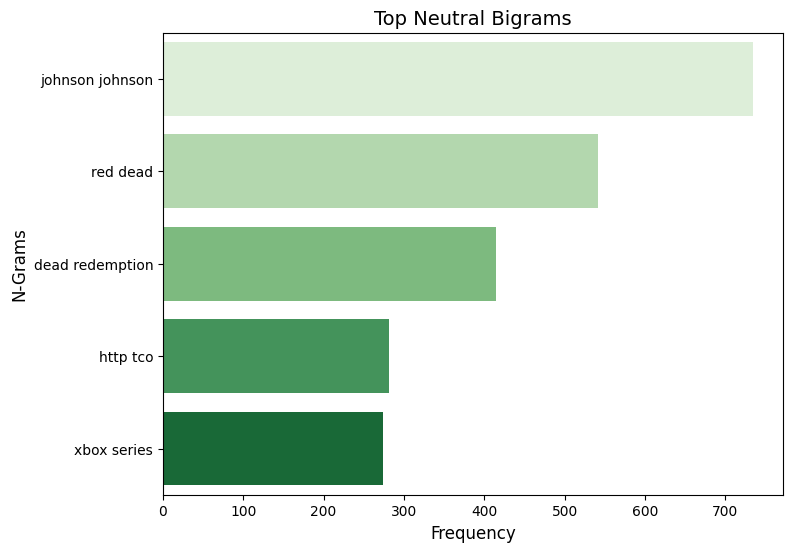

C:\Users\DELL G5\AppData\Local\Temp\ipykernel_13608\1055986065.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette=color)


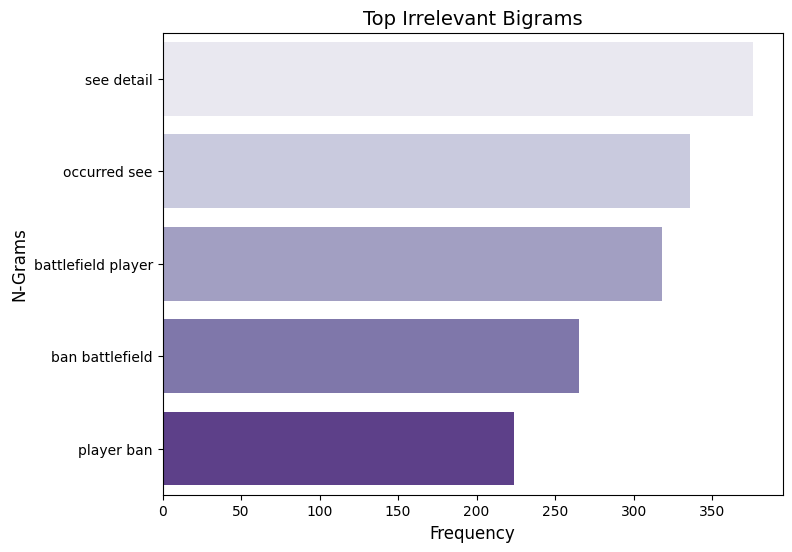

In [153]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_ngrams(text, n=2, top_k=5):
    if text.empty or text.str.strip().eq('').all():
        print("No valid text found for n-gram extraction. Returning empty list.")
        return []
    
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

def plot_ngrams(ngrams, title, color):
    if not ngrams:
        print(f"No n-grams found for {title}. Skipping plot.")
        return
    
    ngram_labels = [gram[0] for gram in ngrams]
    counts = [gram[1] for gram in ngrams]
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts, y=ngram_labels, palette=color)
    plt.title(title, fontsize=14)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('N-Grams', fontsize=12)
    plt.show()

positive_texts = data[data['sentiment'] == 'Positive']['removed_noise_text'].dropna()
negative_texts = data[data['sentiment'] == 'Negative']['removed_noise_text'].dropna()
neutral_texts = data[data['sentiment'] == 'Neutral']['removed_noise_text'].dropna()
irrelevant_texts = data[data['sentiment'] == 'Irrelevant']['removed_noise_text'].dropna()

plot_ngrams(get_top_ngrams(positive_texts), 'Top Positive Bigrams', 'Blues')
plot_ngrams(get_top_ngrams(negative_texts), 'Top Negative Bigrams', 'Reds')
plot_ngrams(get_top_ngrams(neutral_texts), 'Top Neutral Bigrams', 'Greens')
plot_ngrams(get_top_ngrams(irrelevant_texts), 'Top Irrelevant Bigrams', 'Purples')

## Step 4: Feature Engineering

TF-IDF Vectorization:

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer.fit(data['removed_noise_text'])

print(f"Total Vocabulary Size: {len(vectorizer.vocabulary_)}")

Total Vocabulary Size: 308566


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 80000, ngram_range=(1, 2))
X = vectorizer.fit_transform(data['removed_noise_text'])
y = data['sentiment']

In [111]:
X.shape, y.shape

((69222, 80000), (69222,))

Encode target variable:

In [112]:
sentiment_mapping = {
    'Positive': 0,
    'Negative': 1,
    'Neutral': 2,
    'Irrelevant': 3
}
y = y.map(sentiment_mapping)

In [113]:
y

0        0
1        0
2        0
3        0
4        0
        ..
75668    2
75669    0
75671    2
75675    3
75676    3
Name: sentiment, Length: 69222, dtype: int64

## Step 5: Model Training and Evaluation

Split the data:

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55377, 80000), (13845, 80000), (55377,), (13845,))

Define and train models:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Accuracy: {accuracy:.2f}")
    print(f"Training Time: {training_time:.2f}s, Prediction Time: {prediction_time:.2f}s")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("-" * 60)

Training Logistic Regression...
Logistic Regression Test Accuracy: 0.89
Training Time: 16.96s, Prediction Time: 0.00s
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3746
           1       0.91      0.90      0.91      4280
           2       0.88      0.87      0.88      3401
           3       0.86      0.90      0.88      2418

    accuracy                           0.89     13845
   macro avg       0.88      0.89      0.89     13845
weighted avg       0.89      0.89      0.89     13845

Confusion Matrix:
[[3300  149  163  134]
 [ 161 3850  163  106]
 [ 174  152 2968  107]
 [ 103   71   71 2173]]
------------------------------------------------------------
Training Random Forest...
Random Forest Test Accuracy: 0.92
Training Time: 881.13s, Prediction Time: 2.13s
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3746
           1 

## Step 6: Hyperparameter Tuning
Randomized Search for Random Forest:

In [117]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), rf_param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose = 4)
rf_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, verbose=4)

In [118]:
rf_best_model = rf_random_search.best_estimator_
rf_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Best RandomForest Params: {rf_random_search.best_params_}")
print(f"RandomForest Accuracy: {rf_accuracy:.4f}")

Best RandomForest Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
RandomForest Accuracy: 0.9216


# Step 7: Save the Model and Vectorizer
Save the best model:

In [119]:
from joblib import dump

dump(rf_random_search, 'rf_model.joblib')
print("Model saved successfully!")

Model saved successfully!


Save the vectorizer:

In [120]:
dump(vectorizer, "tfidf_vectorizer.joblib")
print("Vectorizer saved successfully!")

Vectorizer saved successfully!
